 # Create and Use a Virtual Environment in JupyterLab
 activate myven -----source Capston_Project/myenv/bin/activate


In [1]:
!pip install kaggle


Defaulting to user installation because normal site-packages is not writeable


# data loading and api call


In [8]:
from src.data_loader import download_and_extract_dataset

download_and_extract_dataset(
    dataset_id="vbhanu5ai/plant-leaf-disease-dataset",
    download_path="data/"
)



# Exploratory Data Analysis(EDA)

## 1.Class distribution
using a bar plot for check if the dataset is balance or not

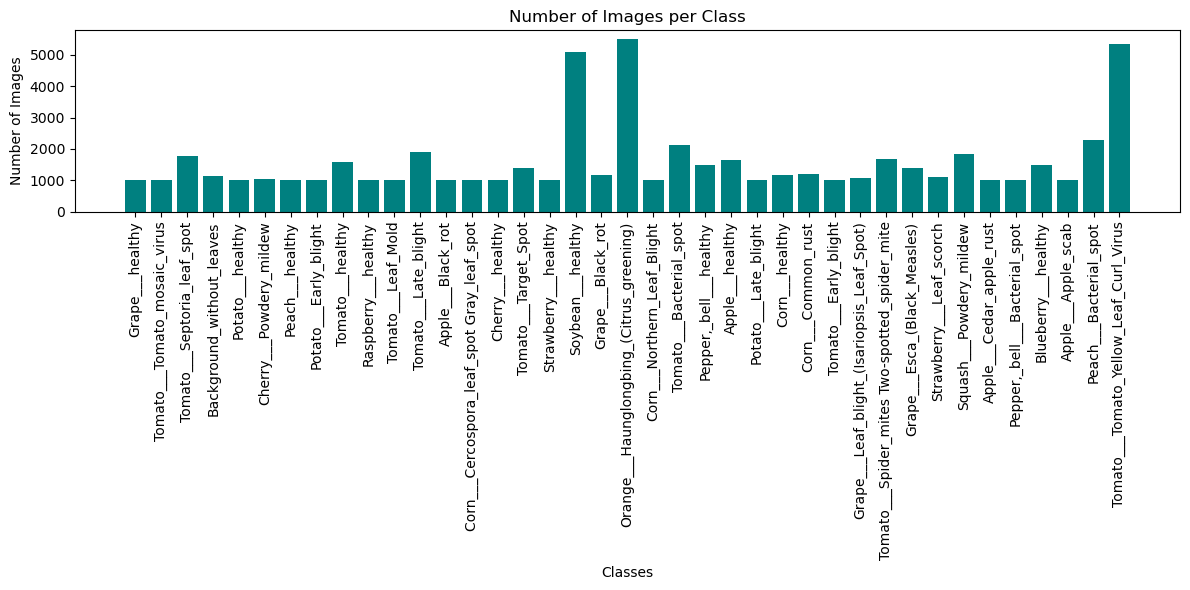

In [1]:
import os
import matplotlib.pyplot as plt

data_path = "data/Plant_leave_diseases_dataset_with_augmentation"
class_names = os.listdir(data_path)

class_counts = {cls: len(os.listdir(os.path.join(data_path, cls))) for cls in class_names}

# Bar plot
plt.figure(figsize=(12,6))
plt.bar(class_counts.keys(), class_counts.values(), color='teal')
plt.xticks(rotation=90)
plt.title("Number of Images per Class")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()


## 2. Display Sample Images per Class

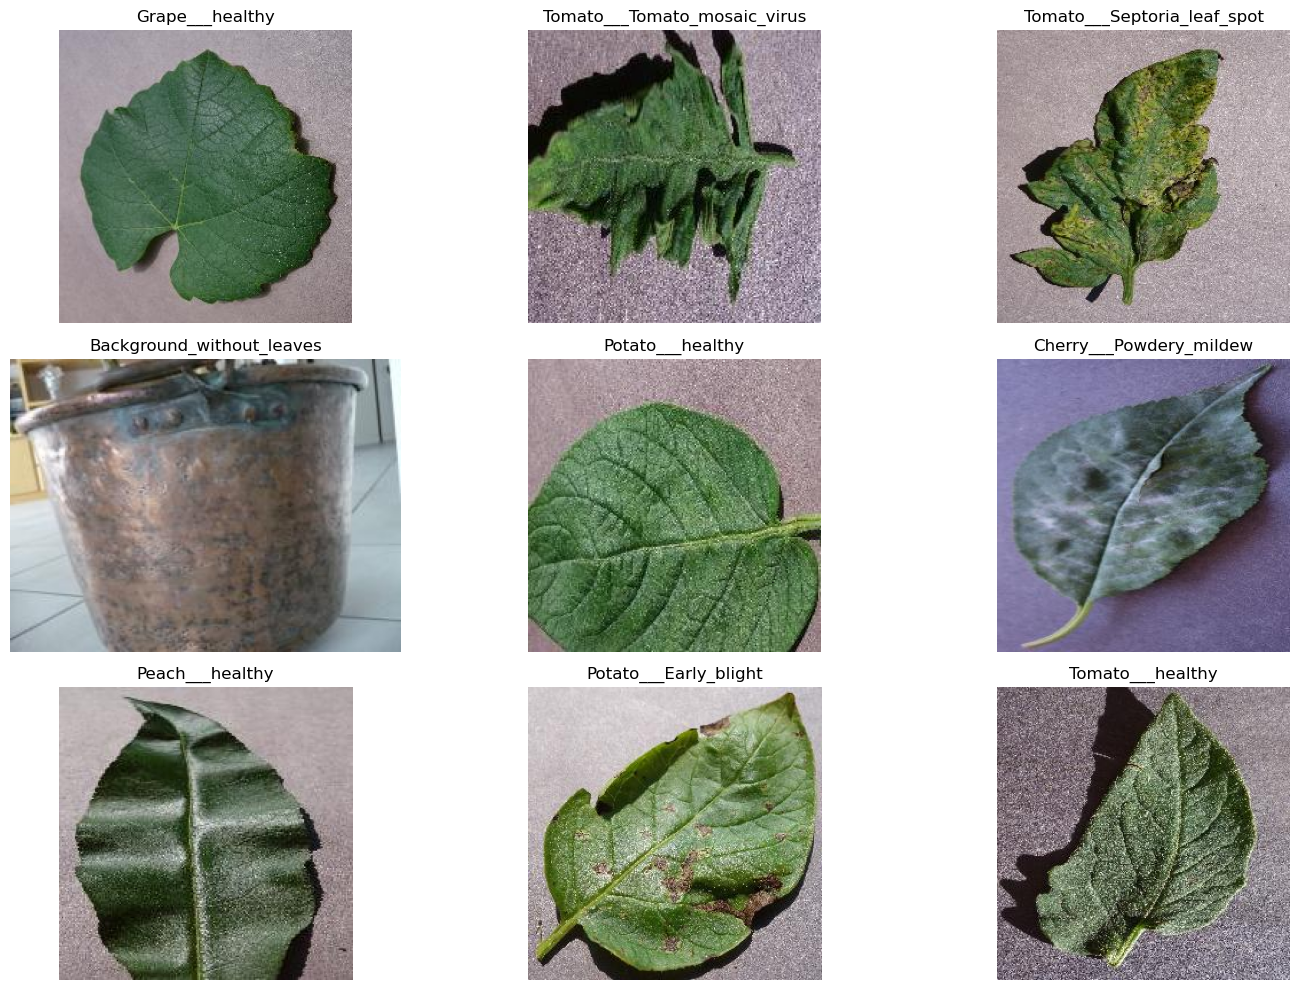

In [2]:
import random
from PIL import Image

plt.figure(figsize=(15, 10))
for i, cls in enumerate(class_names[:9]):
    cls_path = os.path.join(data_path, cls)
    img_file = random.choice(os.listdir(cls_path))
    img_path = os.path.join(cls_path, img_file)
    img = Image.open(img_path)

    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')

plt.tight_layout()
plt.show()


## 3. Image Size Distribution

In [3]:
from collections import Counter

sizes = []

for cls in class_names:
    cls_folder = os.path.join(data_path, cls)
    for img_name in os.listdir(cls_folder):
        img_path = os.path.join(cls_folder, img_name)
        try:
            with Image.open(img_path) as img:
                sizes.append(img.size)
        except:
            pass

# Count most common sizes
size_counts = Counter(sizes)
print("Most common image sizes:")
for size, count in size_counts.most_common(5):
    print(f"{size}: {count} images")


Most common image sizes:
(256, 256): 55409 images
(204, 204): 4564 images
(256, 192): 1143 images
(350, 350): 370 images


 ## 4. Check for Corrupted Images

In [4]:
corrupted = []

for cls in class_names:
    cls_folder = os.path.join(data_path, cls)
    for img_name in os.listdir(cls_folder):
        img_path = os.path.join(cls_folder, img_name)
        try:
            img = Image.open(img_path)
            img.verify()  # Will raise an exception if corrupted
        except:
            corrupted.append(img_path)

print(f"Total corrupted images: {len(corrupted)}")


Total corrupted images: 0


 ## 5.Total Images, Classes, and Samples per Class Summary

In [ ]:
import pandas as pd

# Count per class
class_counts = {cls: len(os.listdir(os.path.join(data_path, cls))) for cls in class_names}

df_summary = pd.DataFrame({
    'Class Name': list(class_counts.keys()),
    'Image Count': list(class_counts.values())
})

df_summary['Percentage'] = round((df_summary['Image Count'] / df_summary['Image Count'].sum()) * 100, 2)

print(f"Total Classes: {len(df_summary)}")
print(f"Total Images: {df_summary['Image Count'].sum()}")
df_summary.sort_values(by='Image Count', ascending=False).reset_index(drop=True)


## 6.Image Aspect Ratio Analysis

In [ ]:
aspect_ratios = []

for cls in class_names:
    cls_folder = os.path.join(data_path, cls)
    for img_name in os.listdir(cls_folder):
        img_path = os.path.join(cls_folder, img_name)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                aspect_ratios.append(round(width / height, 2))
        except:
            continue

# Plot
plt.figure(figsize=(8,5))
plt.hist(aspect_ratios, bins=30, color='orange')
plt.title("Aspect Ratio Distribution of Images")
plt.xlabel("Aspect Ratio (Width / Height)")
plt.ylabel("Frequency")
plt.show()


## 7. RGB Channel Distribution (Check color intensity)
Each color in the plot (Red, Green, Blue) represents the mean pixel intensity across all the images you sampled.

Axis	Meaning
X-axis	Mean pixel intensity (range: 0–255) for each RGB channel
Y-axis	Frequency (how many images had that mean intensity)


In [ ]:
import numpy as np

r_values, g_values, b_values = [], [], []

for cls in class_names[:5]:  # Take 5 classes to keep it light
    cls_folder = os.path.join(data_path, cls)
    for img_name in os.listdir(cls_folder)[:50]:  # Limit for speed
        img_path = os.path.join(cls_folder, img_name)
        try:
            img = Image.open(img_path).convert('RGB')
            arr = np.array(img)
            r_values.append(arr[:, :, 0].mean())
            g_values.append(arr[:, :, 1].mean())
            b_values.append(arr[:, :, 2].mean())
        except:
            continue

plt.figure(figsize=(10,5))
plt.hist(r_values, bins=50, alpha=0.5, label='Red', color='r')
plt.hist(g_values, bins=50, alpha=0.5, label='Green', color='g')
plt.hist(b_values, bins=50, alpha=0.5, label='Blue', color='b')
plt.legend()
plt.title("Color Channel Intensity Distribution")
plt.xlabel("Mean Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


## 8. Check for Duplicate Images (for grading)
Duplicate images can cause overfitting .simply remove them if found.

## 9. Image Sharpness / Blur Detection (Optional Advanced)

Blurry images might degrade accuracy. by using this we can check if blur removal is needed or not.

What is Laplacian Variance?
It's a numerical measure of image sharpness.

The higher the variance, the sharper the image.

A low variance (close to 0) means the image is blurry or flat.



In [ ]:
!pip install opencv-python

In [ ]:
import cv2

blur_values = []

for cls in class_names[:5]:  # Sample 5 classes
    cls_folder = os.path.join(data_path, cls)
    for img_name in os.listdir(cls_folder)[:30]:
        img_path = os.path.join(cls_folder, img_name)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            blur = cv2.Laplacian(img, cv2.CV_64F).var()
            blur_values.append(blur)
        except:
            continue

plt.figure(figsize=(8, 4))
plt.hist(blur_values, bins=40, color='purple')
plt.title("Image Sharpness (Laplacian Variance)")
plt.xlabel("Sharpness Value")
plt.ylabel("Frequency")
plt.show()


# DATA PREPROCESSING 
created a data preprocessing module where performing operations like --
- Rescale pixel values(Converts 0–255 pixel range to 0–1 for normalization)
- Split data(Applies train/val split using validation_split)
- Image resizing(All images are resized to same shape (128×128)
- Categorical labels(Prepares softmax-style one-hot labels)


In [10]:



from src.preprocessing import create_image_generators

data_path = "data/Plant_leave_diseases_dataset_with_augmentation"

train_gen, val_gen = create_image_generators(
    data_dir=data_path,
    img_size=(128, 128),
    batch_size=32,
    val_split=0.2
)


Found 49197 images belonging to 39 classes.
Found 12289 images belonging to 39 classes.



## copy a small portion of data into test set and store it in data file 
(run one time only )and then comment out --thats why i have commented out.

In [ ]:
'''from src.utils import create_test_split


create_test_split(
    source_dir="data/Plant_leave_diseases_dataset_with_augmentation",
    test_dir="data/test",
    split_ratio=0.1
)
'''

# MODEL TRAINING
Builds and compiles a CNN model for multi-class image classification.


In [11]:
from src.model import build_model

# Dynamically get input shape and number of classes
input_shape = train_gen.image_shape
num_classes = train_gen.num_classes

model = build_model(input_shape=input_shape, num_classes=num_classes)
model.summary()


/opt/tljh/user/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 39)             │        10,023 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,526,055 (24.89 MB)

 Trainable params: 6,526,055 (24.89 MB)

 Non-trainable params: 0 (0.00 B)

## train the model:

In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import datetime
import os


log_dir = os.path.join("logs", "fit", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Define all callbacks
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True, monitor='val_loss'),
    ModelCheckpoint("models/best_model.h5", save_best_only=True),
    tensorboard_callback
]

# Fit the model
history = model.fit(   
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=callbacks
)



Epoch 1/10


/opt/tljh/user/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1538/1538 ━━━━━━━━━━━━━━━━━━━━ 148s 96ms/step - accuracy: 0.4094 - auc: 0.8859 - loss: 2.1774 - val_accuracy: 0.7227 - val_auc: 0.9845 - val_loss: 0.8691
Epoch 2/10
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 147s 96ms/step - accuracy: 0.7408 - auc: 0.9846 - loss: 0.8403 - val_accuracy: 0.8649 - val_auc: 0.9957 - val_loss: 0.4485
Epoch 3/10
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 147s 96ms/step - accuracy: 0.8184 - auc: 0.9922 - loss: 0.5631 - val_accuracy: 0.8829 - val_auc: 0.9956 - val_loss: 0.3811
Epoch 4/10
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 148s 96ms/step - accuracy: 0.8582 - auc: 0.9942 - loss: 0.4420 - val_accuracy: 0.9111 - val_auc: 0.9965 - val_loss: 0.2852
Epoch 5/10
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 148s 96ms/step - accuracy: 0.8896 - auc: 0.9957 - loss: 0.3446 - val_accuracy: 0.9282 - val_auc: 0.9966 - val_loss: 0.2425
Epoch 6/10
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 148s 96ms/step - accuracy: 0.9075 - auc: 0.9966 - loss: 0.2851 - val_accuracy: 0.9364 - val_auc: 0.9966 - val_loss: 0.2237
Epoch 7/10
1538/1538 

## save the final model

In [13]:
model.save("models/final_model.h5")


## Evaluation on test(unseen)data

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from src.log import logger

# Create test generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory="data/test",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# Evaluate the model on test data
loss, accuracy, auc = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test AUC: {auc:.4f}")
logger.info(f"Test Evaluation Complete — Loss: {loss:.4f}, Accuracy: {accuracy:.4f}, AUC: {auc:.4f}")



Found 6140 images belonging to 39 classes.
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9786 - auc: 0.9992 - loss: 0.0885
Test Loss: 0.0722
Test Accuracy: 0.9801
Test AUC: 0.9994


## Save evaluation matrics

In [20]:
from src.report import generate_report

report, cm = generate_report(model, test_generator)


192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step


In [25]:

pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
tensorboard --logdir logs/fit


SyntaxError: invalid syntax (621508309.py, line 1)